<a href="https://colab.research.google.com/github/Pushpalatha-H/CodSoft_internship/blob/main/CodSoft_internship_Movie_rating_system.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#MOVIE RATING PREDICTION WITH PYTHON
**Build a model that predicts the rating of a movie based on
features like genre, director, and actors.**

In [145]:
import pandas as pd
import numpy as np

In [146]:
import pandas as pd
import numpy as np

df = pd.read_csv("/content/IMDb Movies India.csv", encoding='latin-1') # Try reading with 'latin-1' encoding
# If 'latin-1' does not work try 'ISO-8859-1'


In [147]:
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),-2019.0,109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,-2021.0,90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,-2019.0,110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,-2010.0,105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [148]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  float64
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(2), object(8)
memory usage: 1.2+ MB


In [149]:
df.shape

(15509, 10)

In [150]:
df.columns

Index(['Name', 'Year', 'Duration', 'Genre', 'Rating', 'Votes', 'Director',
       'Actor 1', 'Actor 2', 'Actor 3'],
      dtype='object')

# Drop columns that are not useful for the analysis

In [151]:
df = df.drop(columns = ['Name', 'Actor 2', 'Actor 3'])

In [152]:
df.head()

,Year,Duration,Genre,Rating,Votes,Director,Actor 1
0,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji
1,-2019.0,109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal
2,-2021.0,90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta
3,-2019.0,110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik
4,-2010.0,105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor


# Data Cleaning

In [153]:
df.isna().any()

,0
Year,True
Duration,True
Genre,True
Rating,True
Votes,True
Director,True
Actor 1,True


In [154]:
df.isna().sum()

,0
Year,528
Duration,8269
Genre,1877
Rating,7590
Votes,7589
Director,525
Actor 1,1617


In [155]:
df.dropna(inplace = True)

In [156]:
df.drop_duplicates(inplace = True)

In [157]:
df.shape

(5746, 7)

# Handling Columns

In [158]:
df['Year'].unique()

array([-2019., -1997., -2005., -2012., -2014., -2004., -2016., -1991.,
       -2018., -2010., -1958., -2021., -2017., -2009., -1993., -2002.,
       -2008., -1994., -2007., -2003., -1998., -1979., -1974., -2015.,
       -2006., -1981., -2020., -1985., -2013., -2011., -1988., -1987.,
       -1996., -1999., -1973., -1968., -1982., -1977., -1950., -1969.,
       -1948., -1990., -1989., -2001., -2000., -1953., -1978., -1963.,
       -1992., -1976., -1984., -1986., -1966., -1975., -1980., -1967.,
       -1970., -1952., -1972., -1971., -1964., -1954., -1962., -1957.,
       -1965., -1995., -1956., -1955., -1936., -1983., -1951., -1961.,
       -1959., -1949., -1960., -1946., -1940., -1945., -1938., -1941.,
       -1942., -1935., -1937., -1947., -1931., -1933., -1943., -1944.,
       -1932., -1939., -1934.])

In [159]:
def handleyear(value):
  value = value * -1
  return int(value)
df['Year'] = df['Year'].apply(handleyear)
df['Year'].head()

,Year
1,2019
3,2019
5,1997
6,2005
8,2012


In [160]:
df['Duration'].unique()

array(['109 min', '110 min', '147 min', '142 min', '82 min', '116 min',
       '96 min', '120 min', '161 min', '166 min', '102 min', '87 min',
       '132 min', '105 min', '146 min', '168 min', '158 min', '126 min',
       '94 min', '138 min', '124 min', '144 min', '157 min', '136 min',
       '107 min', '113 min', '80 min', '122 min', '149 min', '148 min',
       '130 min', '121 min', '188 min', '115 min', '103 min', '114 min',
       '170 min', '100 min', '99 min', '140 min', '128 min', '93 min',
       '125 min', '145 min', '75 min', '111 min', '134 min', '104 min',
       '92 min', '137 min', '127 min', '119 min', '135 min', '90 min',
       '150 min', '151 min', '95 min', '52 min', '89 min', '112 min',
       '143 min', '177 min', '117 min', '123 min', '72 min', '154 min',
       '175 min', '153 min', '78 min', '139 min', '133 min', '180 min',
       '46 min', '164 min', '162 min', '171 min', '160 min', '152 min',
       '163 min', '165 min', '141 min', '129 min', '156 min', '240 

In [161]:
def handleDuration(value):
  value = str(value).split(' ')
  value = value[0]
  return int(value)
df['Duration'] = df['Duration'].apply(handleDuration)
df['Duration']

,Duration
1,109
3,110
5,147
6,142
8,82
...,...
15493,115
15494,153
15503,125
15505,129


In [162]:
df['Genre'].unique()

array(['Drama', 'Comedy, Romance', 'Comedy, Drama, Musical',
       'Drama, Romance, War', 'Horror, Mystery, Thriller',
       'Action, Crime, Thriller', 'Horror', 'Horror, Romance, Thriller',
       'Comedy, Drama, Romance', 'Comedy, Drama', 'Crime, Drama, Mystery',
       'Horror, Thriller', 'Comedy, Horror', 'Drama, Horror, Mystery',
       'Action, Thriller', 'Action', 'Horror, Mystery, Romance',
       'Horror, Mystery', 'Drama, Horror, Romance',
       'Action, Drama, History', 'Action, Drama, War', 'Thriller',
       'Comedy', 'Adventure, Horror, Mystery', 'Action, Sci-Fi',
       'Crime, Mystery, Thriller', 'Drama, History', 'Sport',
       'Biography, Drama, History', 'Horror, Romance', 'Crime, Drama',
       'Adventure, Drama', 'Comedy, Mystery, Thriller', 'Drama, Romance',
       'Crime, Thriller', 'Horror, Sci-Fi, Thriller',
       'Drama, Mystery, Thriller', 'Drama, Family, Musical',
       'Action, Comedy', 'Action, Adventure, Fantasy', 'Documentary',
       'Drama, Horro

In [163]:
# Define a function to split the 'Genre' column into multiple columns
def split_genre_column(df,Genre):

    df['Genre1'] = df[Genre].str.split(',', expand=True)[0]
    df['Genre2'] = df[Genre].str.split(',', expand=True)[1]
    df['Genre3'] = df[Genre].str.split(',', expand=True)[2]
    return df

# Apply the 'split_genre_column' function to the DataFrame
split_genre_column(df,'Genre')

,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Genre1,Genre2,Genre3
1,2019,109,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Drama,None,None
3,2019,110,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Comedy,Romance,None
5,1997,147,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Comedy,Drama,Musical
6,2005,142,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Drama,Romance,War
8,2012,82,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Horror,Mystery,Thriller
...,...,...,...,...,...,...,...,...,...,...
15493,2015,115,Drama,6.1,408,Mozez Singh,Vicky Kaushal,Drama,None,None
15494,2001,153,"Biography, Drama, History",6.2,"1,496",Shyam Benegal,Karisma Kapoor,Biography,Drama,History
15503,1989,125,"Action, Crime, Drama",5.8,44,S.P. Muthuraman,Chiranjeevi,Action,Crime,Drama
15505,1999,129,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Action,Drama,None


In [164]:
df.head()

,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Genre1,Genre2,Genre3
1,2019,109,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Drama,None,None
3,2019,110,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Comedy,Romance,None
5,1997,147,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Comedy,Drama,Musical
6,2005,142,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Drama,Romance,War
8,2012,82,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Horror,Mystery,Thriller


In [165]:
df.isna().sum()

,0
Year,0
Duration,0
Genre,0
Rating,0
Votes,0
Director,0
Actor 1,0
Genre1,0
Genre2,1717
Genre3,3412


In [166]:
df = df.fillna(0)
df.isna().sum()

,0
Year,0
Duration,0
Genre,0
Rating,0
Votes,0
Director,0
Actor 1,0
Genre1,0
Genre2,0
Genre3,0


In [167]:
G=['Genre1','Genre2','Genre3']
for x in G:
  df[x],_ = pd.factorize(df[x])
# Factorizing converts categorical data (like genres) into numerical labels.

In [168]:
df = df.drop(columns = ['Genre'])

In [169]:
df.head()

,Year,Duration,Rating,Votes,Director,Actor 1,Genre1,Genre2,Genre3
1,2019,109,7.0,8,Gaurav Bakshi,Rasika Dugal,0,0,0
3,2019,110,4.4,35,Ovais Khan,Prateik,1,1,0
5,1997,147,4.7,827,Rahul Rawail,Bobby Deol,1,2,1
6,2005,142,7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,0,1,2
8,2012,82,5.6,326,Allyson Patel,Yash Dave,2,3,3


In [170]:
df['Votes'].unique()

array(['8', '35', '827', ..., '70,344', '408', '1,496'], dtype=object)

In [171]:
# replace ',' with space
def handleVotes(value):
  value = str(value).replace(',','')
  return int(value)

In [172]:
df['Votes'] = df['Votes'].apply(handleVotes)

In [173]:
df['Votes'].head()

,Votes
1,8
3,35
5,827
6,1086
8,326


In [174]:
df.head()

,Year,Duration,Rating,Votes,Director,Actor 1,Genre1,Genre2,Genre3
1,2019,109,7.0,8,Gaurav Bakshi,Rasika Dugal,0,0,0
3,2019,110,4.4,35,Ovais Khan,Prateik,1,1,0
5,1997,147,4.7,827,Rahul Rawail,Bobby Deol,1,2,1
6,2005,142,7.4,1086,Shoojit Sircar,Jimmy Sheirgill,0,1,2
8,2012,82,5.6,326,Allyson Patel,Yash Dave,2,3,3


In [175]:
df.columns

Index(['Year', 'Duration', 'Rating', 'Votes', 'Director', 'Actor 1', 'Genre1',
       'Genre2', 'Genre3'],
      dtype='object')

In [176]:
df['MovieAge'] = 2024 - df['Year']
df['MovieAge']

,MovieAge
1,5
3,5
5,27
6,19
8,12
...,...
15493,9
15494,23
15503,35
15505,25


#Popularity of Director and Actor

In [177]:
Director_Counts = df['Director'].value_counts()
df['Director_Popularity'] = df['Director'].map(Director_Counts)

Actor_Counts = df['Actor 1'].value_counts()
df['Actor_Popularity'] = df['Actor 1'].map(Actor_Counts)

# Average Historical Ratings

In [178]:
Director_AvgRating = df.groupby('Director')['Rating'].mean()
df['Director_AvgRating'] = df['Director'].map(Director_AvgRating)

In [179]:
ActorAvgRating = df[['Actor 1']].stack().reset_index(name='Actor')
ActorAvgRating = ActorAvgRating.merge(df[['Rating']], left_on='level_0', right_index=True)
ActorAvgRating = ActorAvgRating.groupby('Actor')['Rating'].mean()
df['ActorAvgRating'] = df['Actor 1'].map(ActorAvgRating)

# Data Visualization

<ipython-input-180-db65d19e0ac2>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = df[df['Director'].isin(TopDirectors)], x = 'Director', y = 'Rating', palette = 'rocket')


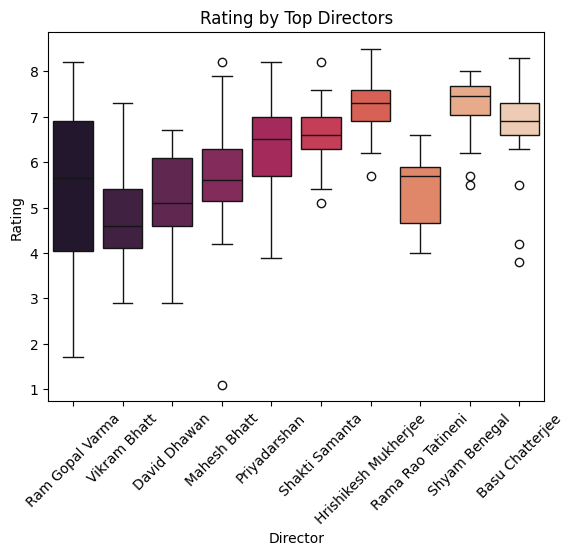

In [180]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

TopDirectors = df['Director'].value_counts().index[0:10]
sns.boxplot(data = df[df['Director'].isin(TopDirectors)], x = 'Director', y = 'Rating', palette = 'rocket')
plt.xticks(rotation = 45)
plt.title("Rating by Top Directors")
plt.show()

# Actors Influence on rating

<ipython-input-181-00987a81b987>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = df[df['Actor 1'].isin(TopActors)], x = 'Actor 1', y = 'Rating', palette = 'mako')


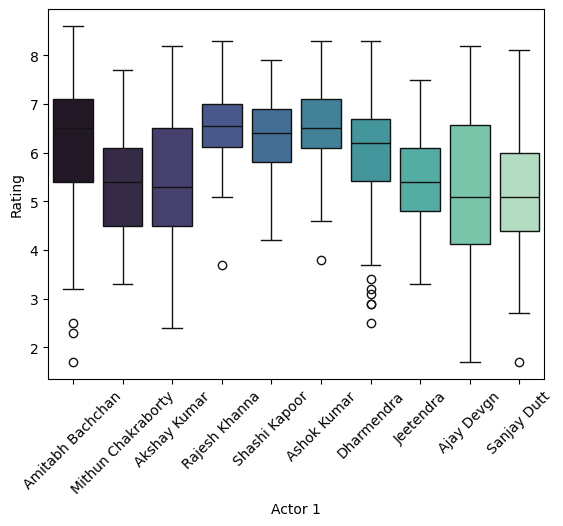

In [181]:
TopActors = df['Actor 1'].value_counts().index[:10]
sns.boxplot(data = df[df['Actor 1'].isin(TopActors)], x = 'Actor 1', y = 'Rating', palette = 'mako')
plt.xticks(rotation = 45)
plt.show()

In [182]:
df['Genre1 encoded'] =round(df.groupby('Genre1')['Rating'].transform('mean'),1)
df['Genre2 encoded']=round(df.groupby('Genre2')['Rating'].transform('mean'),1)
df['Genre3 encoded'] =round(df.groupby('Genre3')['Rating'].transform('mean'),1)
df['Votes encoded'] =round(df.groupby('Votes')['Rating'].transform('mean'), 1)
df['Director encoded']= round(df.groupby('Director')['Rating'].transform('mean'), 1)
df['Actor 1 encoded']= round(df.groupby('Actor 1')['Rating'].transform('mean'), 1)
df.head()

,Year,Duration,Rating,Votes,Director,Actor 1,Genre1,Genre2,Genre3,MovieAge,Director_Popularity,Actor_Popularity,Director_AvgRating,ActorAvgRating,Genre1 encoded,Genre2 encoded,Genre3 encoded,Votes encoded,Director encoded,Actor 1 encoded
1,2019,109,7.0,8,Gaurav Bakshi,Rasika Dugal,0,0,0,5,1,2,7.000000,6.850000,6.3,6.0,6.0,5.6,7.0,6.8
3,2019,110,4.4,35,Ovais Khan,Prateik,1,1,0,5,1,5,4.400000,5.420000,5.8,5.9,6.0,5.7,4.4,5.4
5,1997,147,4.7,827,Rahul Rawail,Bobby Deol,1,2,1,27,15,18,5.313333,4.788889,5.8,5.9,6.0,4.8,5.3,4.8
6,2005,142,7.4,1086,Shoojit Sircar,Jimmy Sheirgill,0,1,2,19,6,20,7.383333,5.435000,6.3,5.9,6.3,7.4,7.4,5.4
8,2012,82,5.6,326,Allyson Patel,Yash Dave,2,3,3,12,1,1,5.600000,5.600000,4.7,5.7,5.7,6.6,5.6,5.6


In [183]:
df.drop(columns=['Genre1','Votes','Director','Actor 1','Genre2','Genre3'],inplace=True)
df['Rating'] =round(df['Rating'],1)

In [184]:
x = df.drop(['Rating'], axis =1)
y = df['Rating']

In [185]:
x.head()

,Year,Duration,MovieAge,Director_Popularity,Actor_Popularity,Director_AvgRating,ActorAvgRating,Genre1 encoded,Genre2 encoded,Genre3 encoded,Votes encoded,Director encoded,Actor 1 encoded
1,2019,109,5,1,2,7.000000,6.850000,6.3,6.0,6.0,5.6,7.0,6.8
3,2019,110,5,1,5,4.400000,5.420000,5.8,5.9,6.0,5.7,4.4,5.4
5,1997,147,27,15,18,5.313333,4.788889,5.8,5.9,6.0,4.8,5.3,4.8
6,2005,142,19,6,20,7.383333,5.435000,6.3,5.9,6.3,7.4,7.4,5.4
8,2012,82,12,1,1,5.600000,5.600000,4.7,5.7,5.7,6.6,5.6,5.6


#Train_Test_Split

In [186]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state = 52)

In [187]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
import xgboost as xgb
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeRegressor


In [188]:
df.head()

,Year,Duration,Rating,MovieAge,Director_Popularity,Actor_Popularity,Director_AvgRating,ActorAvgRating,Genre1 encoded,Genre2 encoded,Genre3 encoded,Votes encoded,Director encoded,Actor 1 encoded
1,2019,109,7.0,5,1,2,7.000000,6.850000,6.3,6.0,6.0,5.6,7.0,6.8
3,2019,110,4.4,5,1,5,4.400000,5.420000,5.8,5.9,6.0,5.7,4.4,5.4
5,1997,147,4.7,27,15,18,5.313333,4.788889,5.8,5.9,6.0,4.8,5.3,4.8
6,2005,142,7.4,19,6,20,7.383333,5.435000,6.3,5.9,6.3,7.4,7.4,5.4
8,2012,82,5.6,12,1,1,5.600000,5.600000,4.7,5.7,5.7,6.6,5.6,5.6


In [192]:
X=df.drop("Rating",axis=1)
Y=df["Rating"]

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=52)

#LinearRegression

In [195]:
model=LinearRegression()
model.fit(X_train,Y_train)

X_test_prediction= model.predict(X_test)
model.score(x_test, y_test)

0.7895953031655767

In [194]:
mse =mean_squared_error(Y_test,X_test_prediction)
print(f"Mean Squared Error (MSE): {mse:.2f}")

r2 = r2_score(Y_test,X_test_prediction)
print(f"R-squared score: {r2:.2f}")

Mean Squared Error (MSE): 0.41
R-squared score: 0.79


# Decision Tree Classifier

In [196]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.1)

model_DT=DecisionTreeRegressor(random_state=42)
model_DT.fit(X_train,Y_train)
X_test_prediction_DT=model_DT.predict(X_test)

mse_DT =mean_squared_error(Y_test,X_test_prediction_DT)
print(f"Mean Squared Error (MSE): {mse_DT:.2f}")

r2_DT = r2_score(Y_test,X_test_prediction_DT)
print(f"R-squared score: {r2_DT:.2f}")

Mean Squared Error (MSE): 0.54
R-squared score: 0.74
